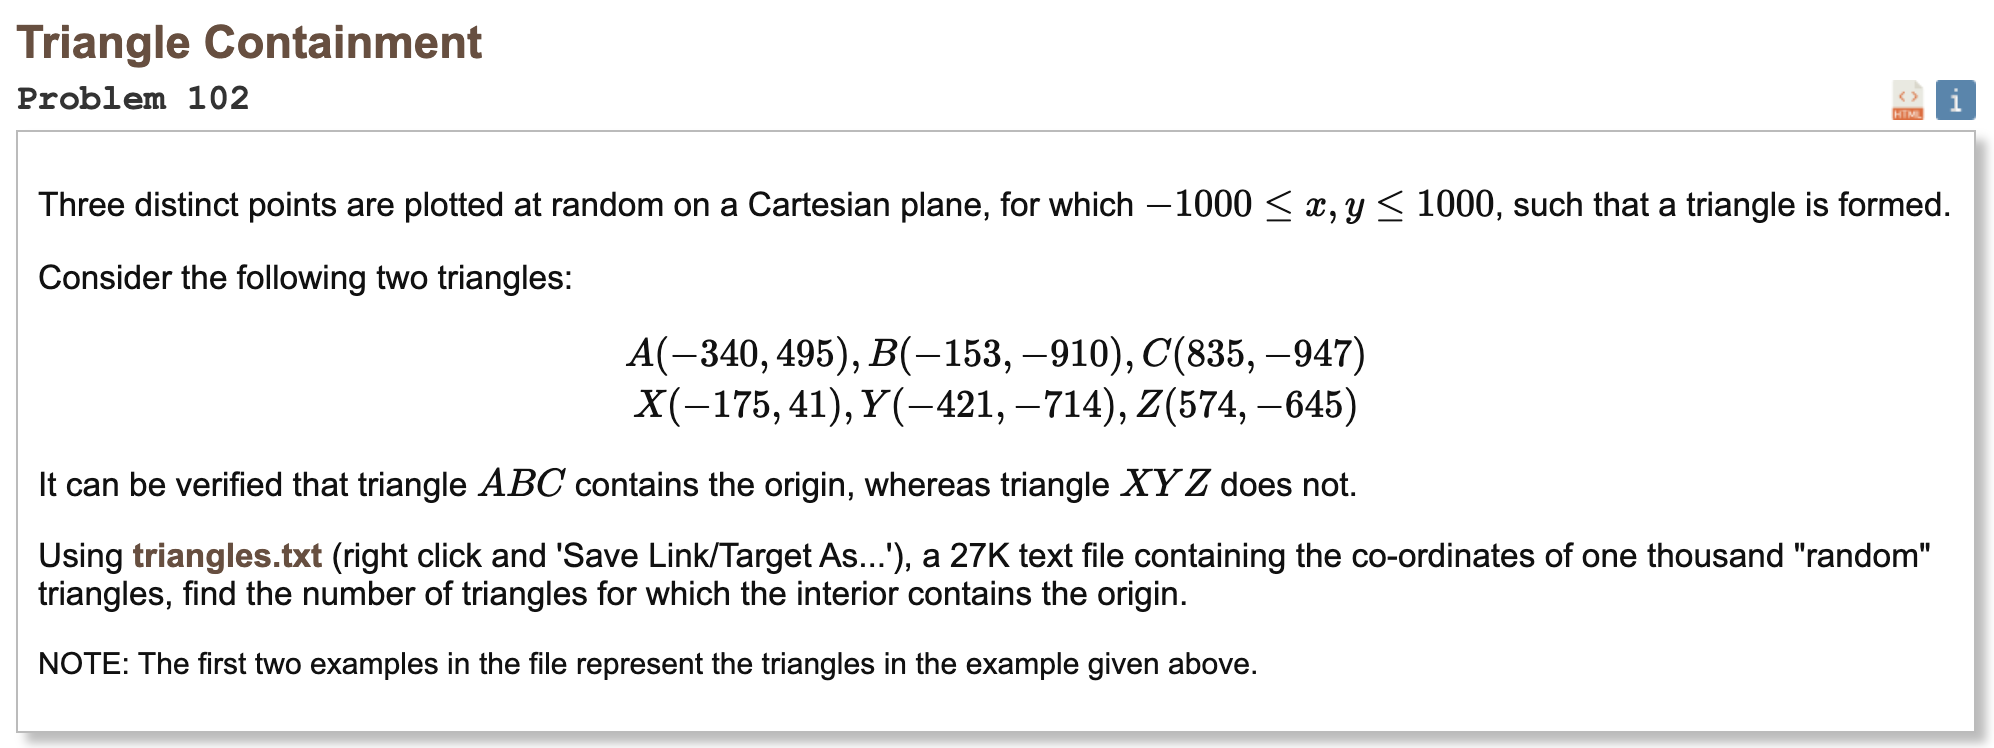

## Initial approach

* Visualize first triangle
* it clearly contains origin point
* however we need a method to understand it without a visual

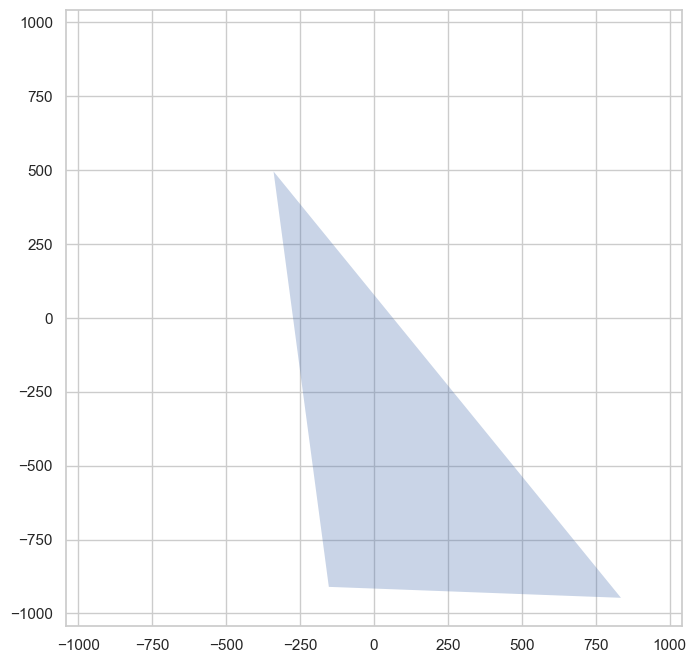

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

points = np.array([[-340, 495], [-153, -910], [835, -947]])
x = points[:, 0]
y = points[:, 1]

sns.set_theme(style="whitegrid")

r = np.max(np.abs(points)) * 1.1

fig, ax = plt.subplots(figsize=(8, 8))
ax.fill(x, y, alpha=0.3, edgecolor="none")

ax.set_xlim(-r, r)
ax.set_ylim(-r, r)
ax.set_aspect("equal", adjustable="box")

plt.show()

* u and v are vectors
* define a function for determinant
* check the sign of cross function (s,t and u in contains_origin_fast stores sign)
* if all three signs are positive or all negative, origin is inside.

In [2]:
def cross(u, v):
    return u[0]*v[1] - u[1]*v[0]

def contains_origin_fast(a, b, c, strict=True):
    s = cross(b, c)
    t = cross(c, a)
    u = cross(a, b)
    if strict:
        return (s > 0 and t > 0 and u > 0) or (s < 0 and t < 0 and u < 0)
    else:
        return (s >= 0 and t >= 0 and u >= 0) or (s <= 0 and t <= 0 and u <= 0)

In [3]:
%%time

cnt = 0
with open("0102_triangles.txt") as f:
    for line in f:
        vals = line.strip().split(",")
        if len(vals) != 6:
            continue
        x1, y1, x2, y2, x3, y3 = map(int, vals)
        if contains_origin_fast((x1, y1), (x2, y2), (x3, y3), strict=True):
            cnt += 1
print("Result:", cnt)

Result: 228
CPU times: user 1.33 ms, sys: 282 μs, total: 1.61 ms
Wall time: 1.43 ms
